# Daria Bromot - FS50007 

## K Means Clustering with Python

### Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

### Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

### Visualize Data

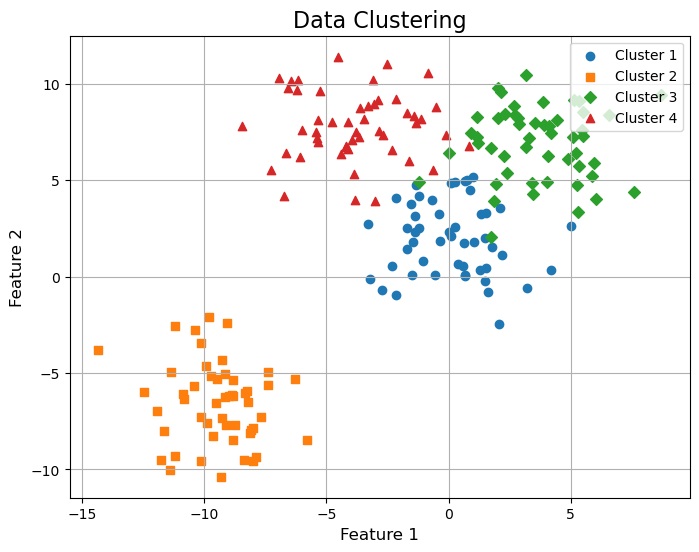

In [11]:
# Separate data into features and labels
features = data[0]
labels = data[1]

# Create a list of markers for each cluster
markers = ['o', 's', 'D', '^']

# Create the plot
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_points = features[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=markers[i], label=f'Cluster {i+1}')

# Set plot title and labels
plt.title('Data Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


### Creating the Clusters

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4)

In [14]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [15]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [16]:
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       1, 0])

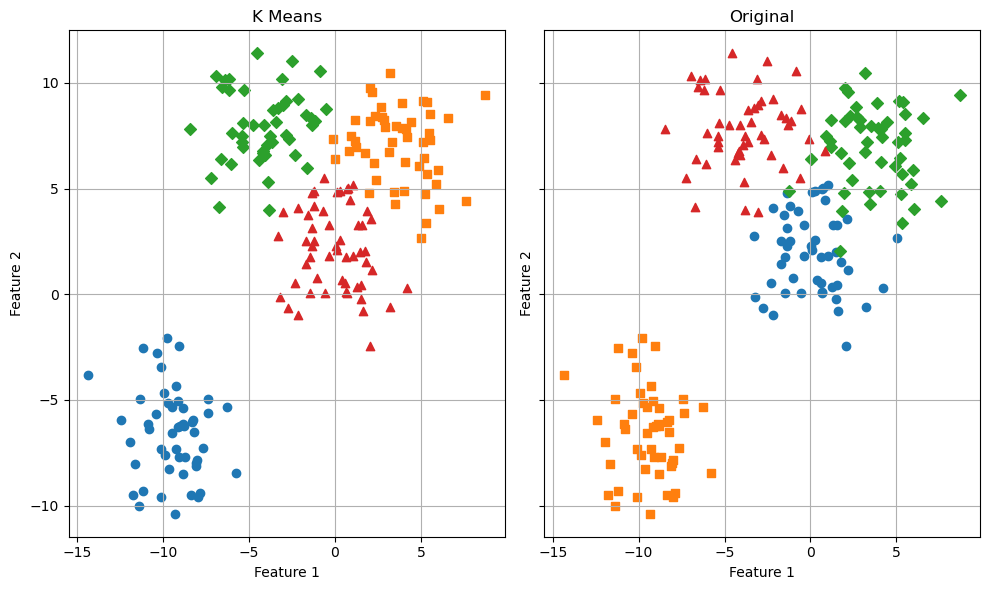

In [48]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot K-means clustering
markers = ['o', 's', 'D', '^']
for i in range(4):
    cluster_points = data[0][kmeans.labels_ == i]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=markers[i], label=f'Cluster {i+1}')

ax1.set_title('K Means')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True)

# Plot original data
for i in range(4):
    cluster_points = data[0][data[1] == i]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=markers[i], label=f'Cluster {i+1}')

ax2.set_title("Original")
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(True)

# Display the subplots
plt.tight_layout()
plt.show()


You should note, the colors are meaningless in reference between the two plots.

**Find the best number of clusters and random_state**

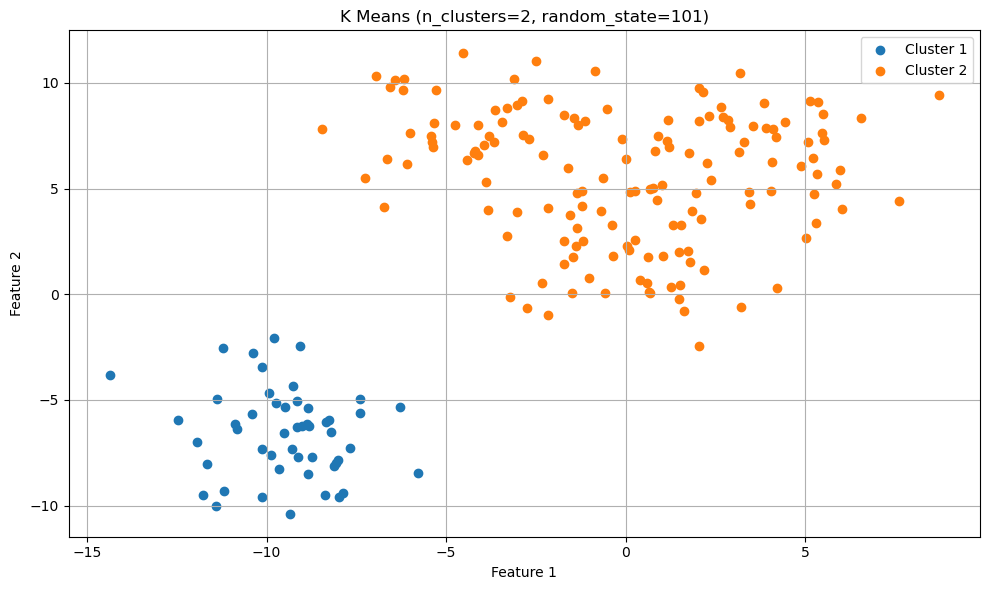

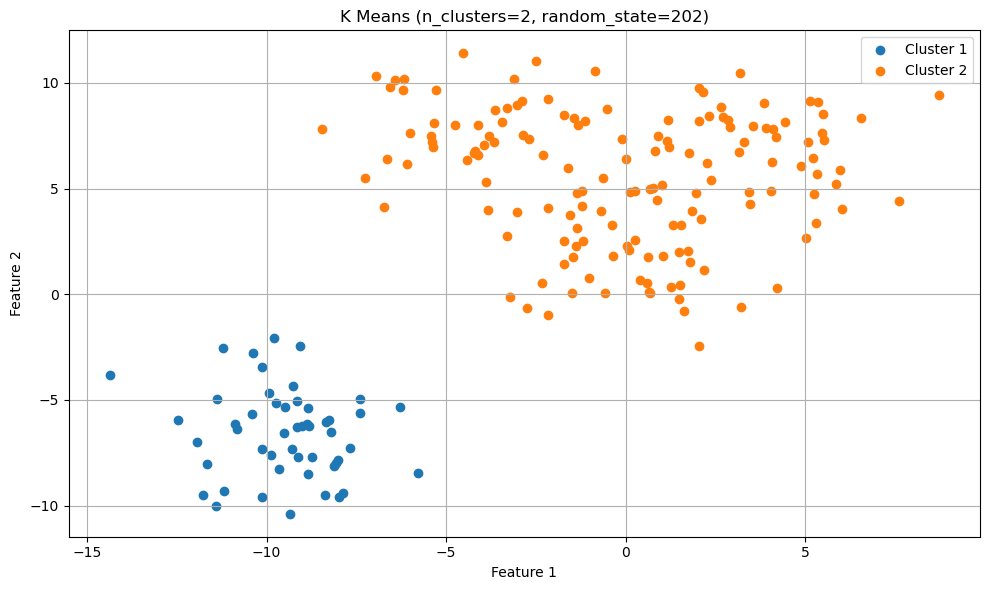

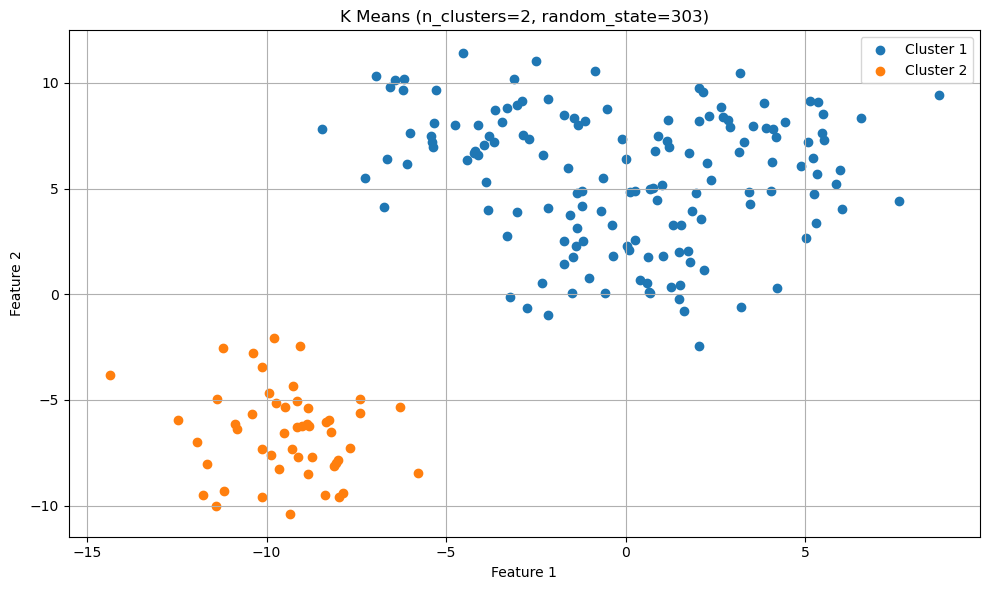

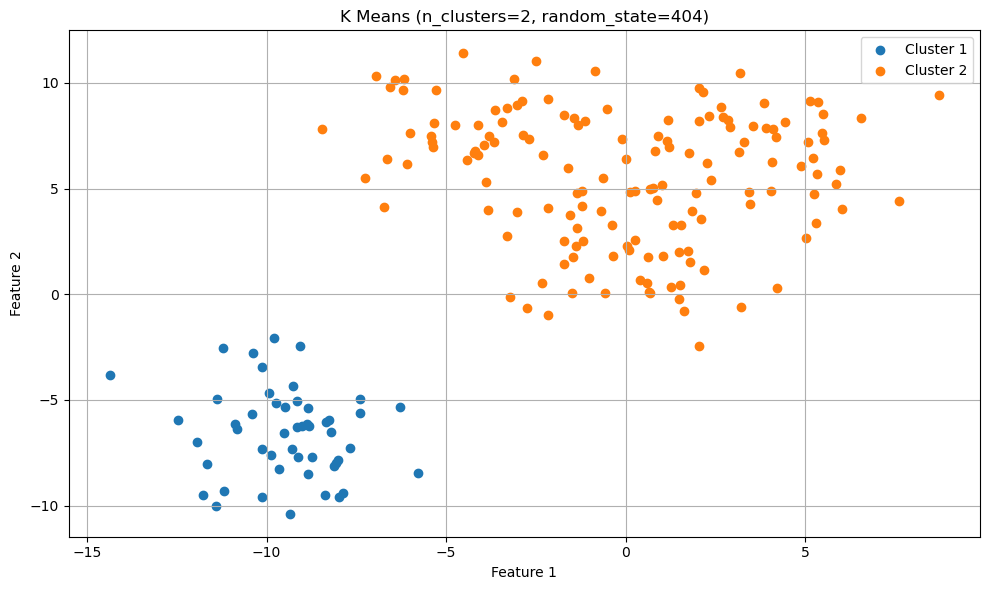

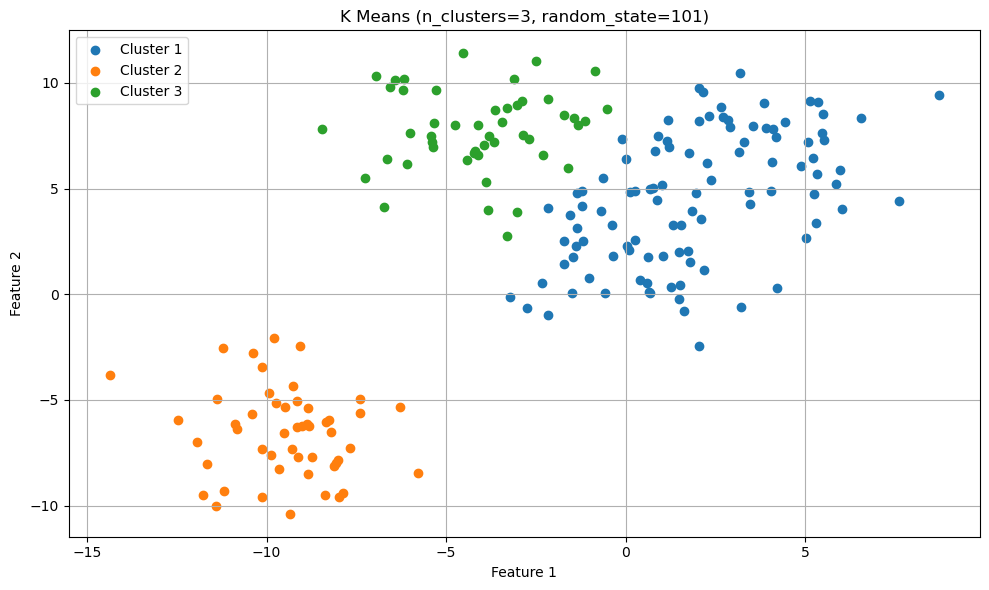

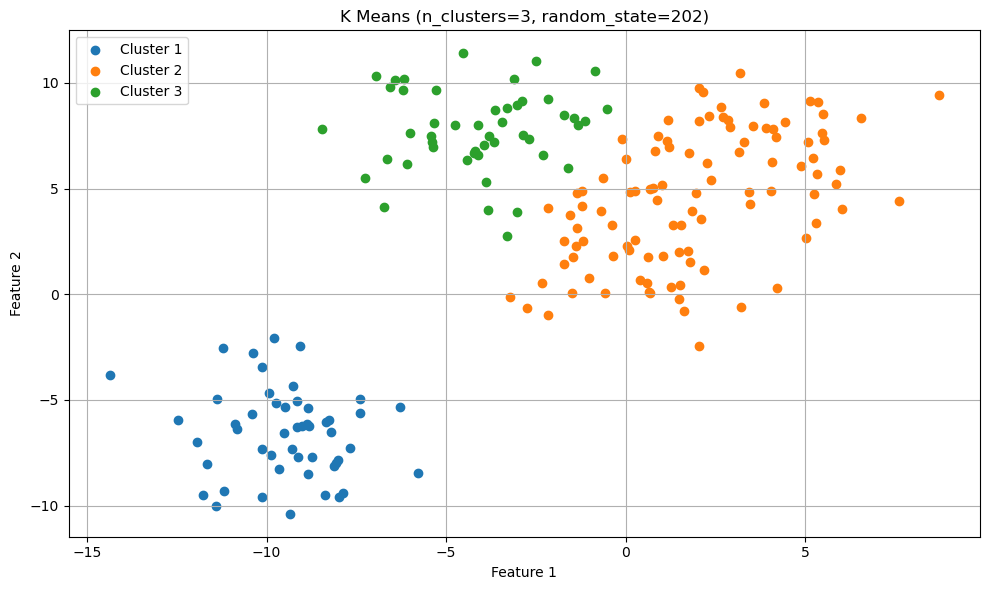

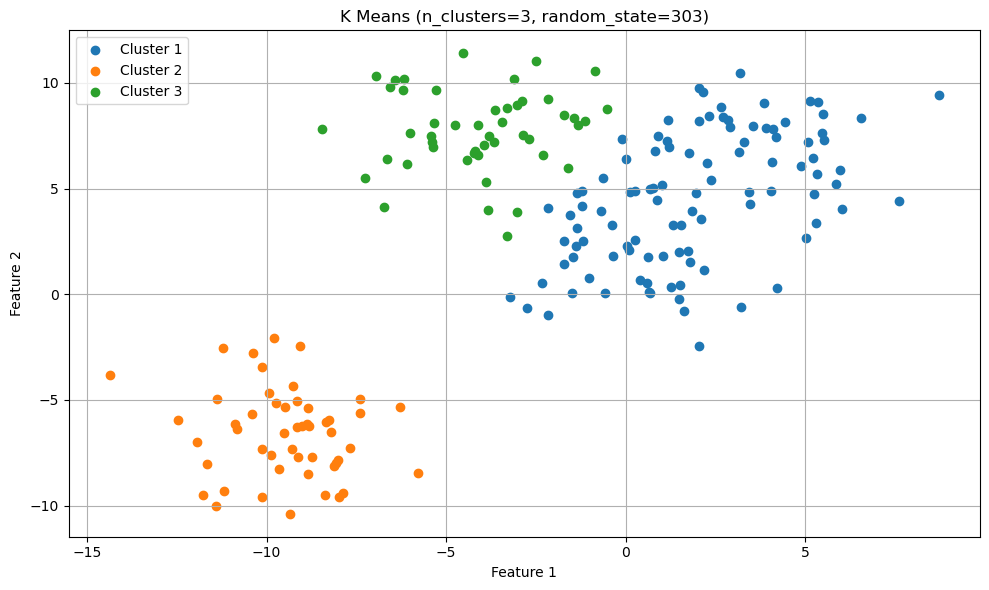

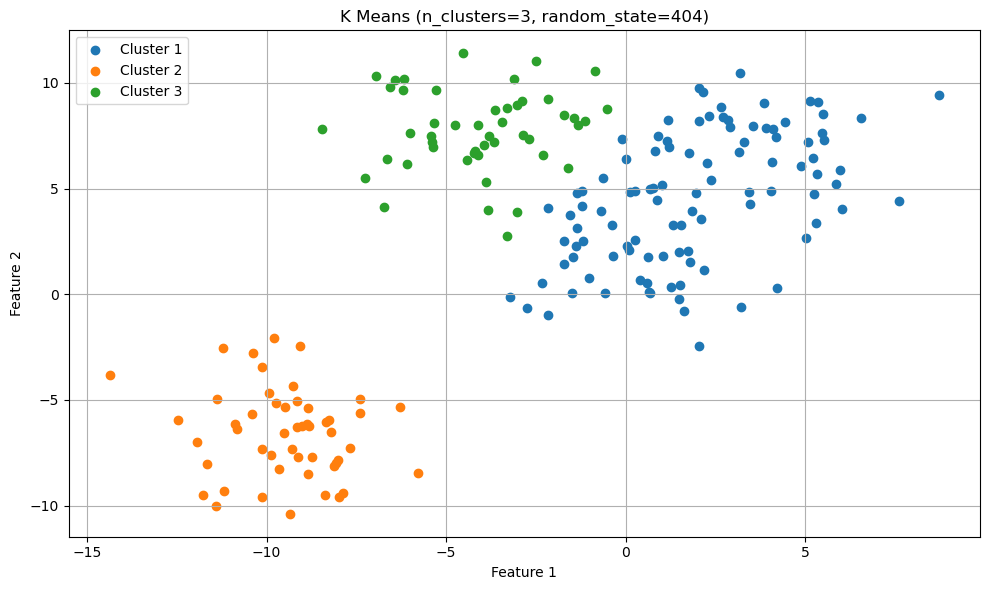

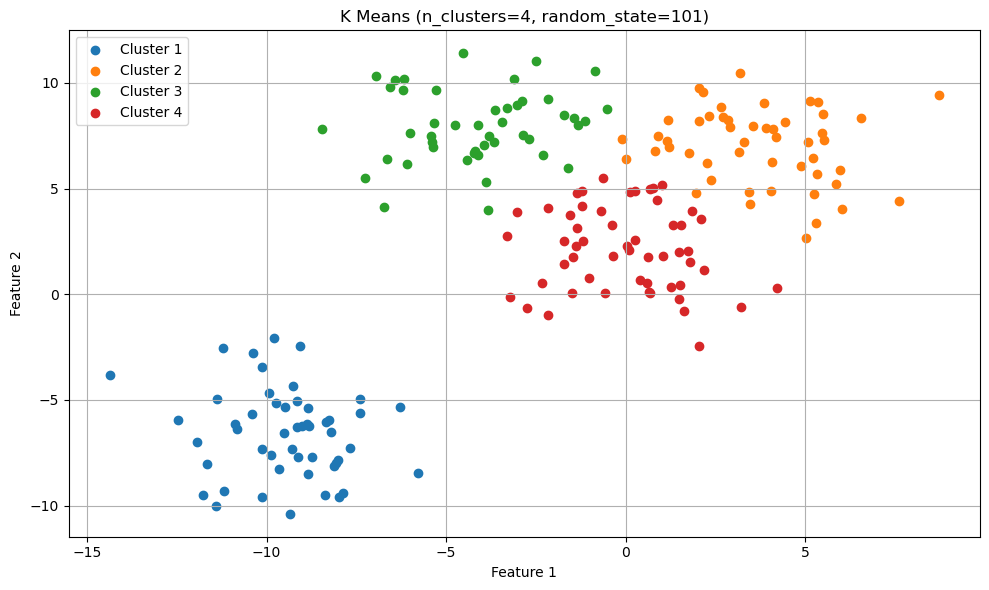

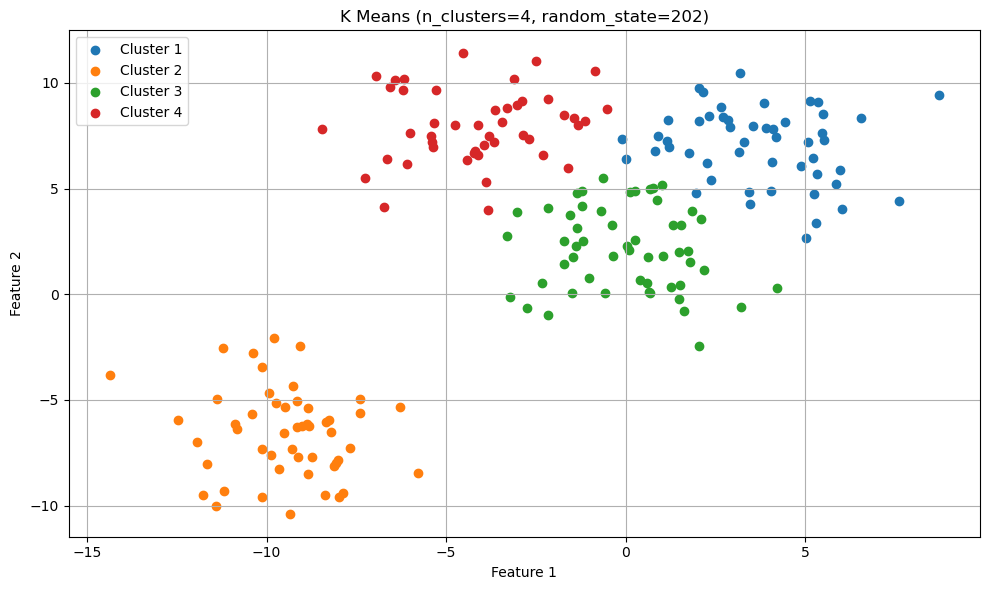

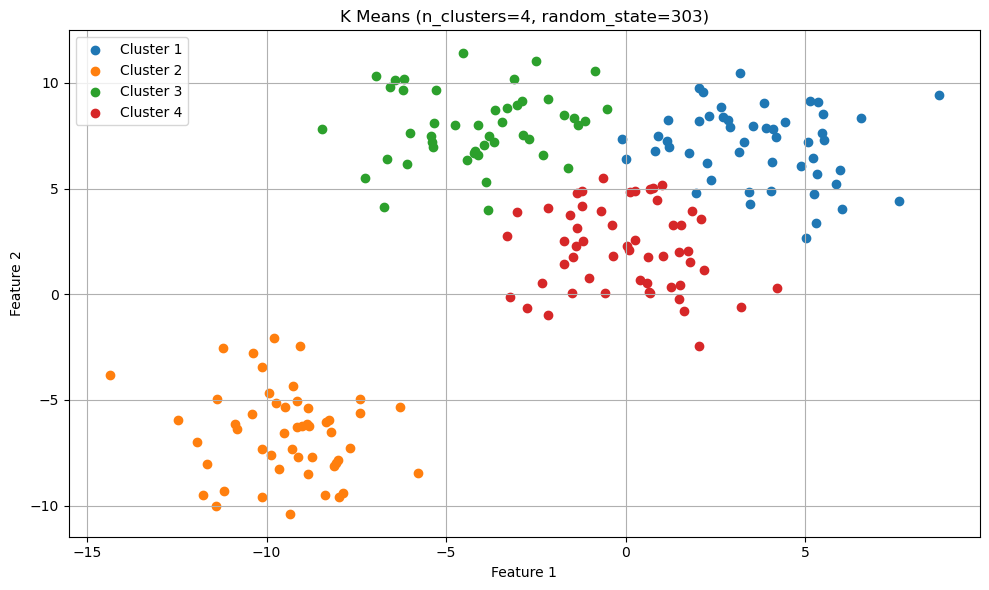

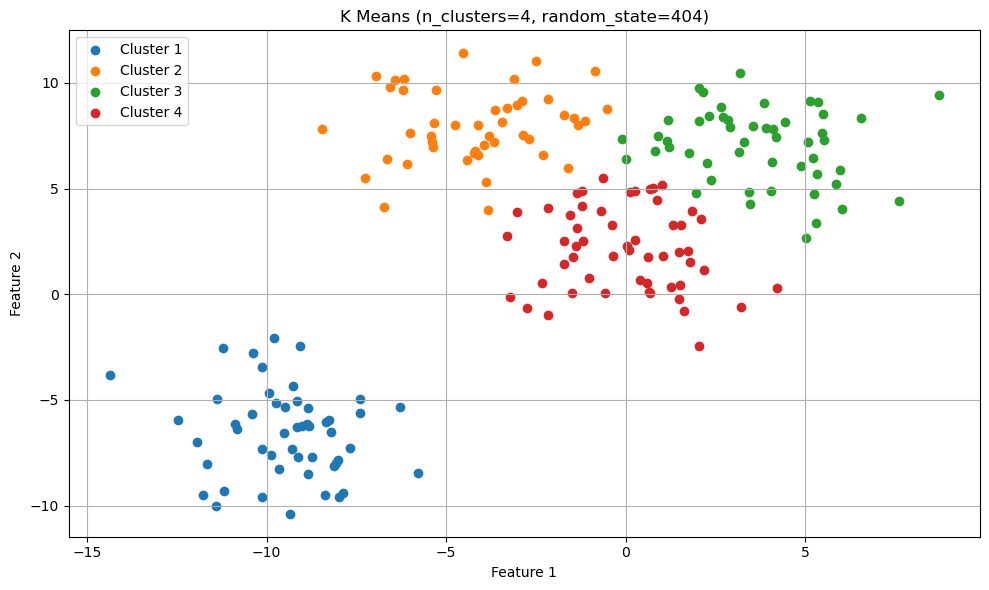

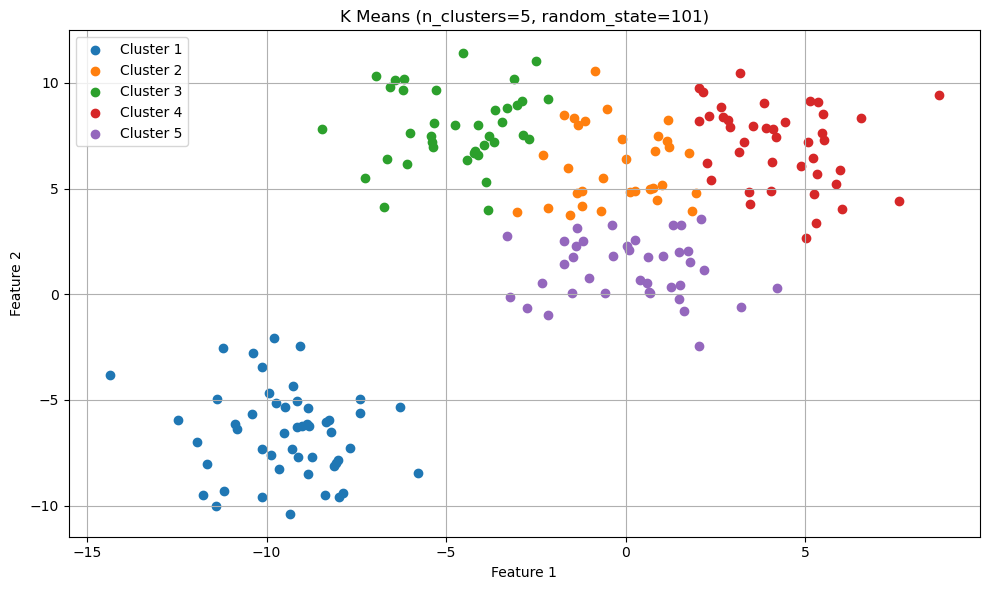

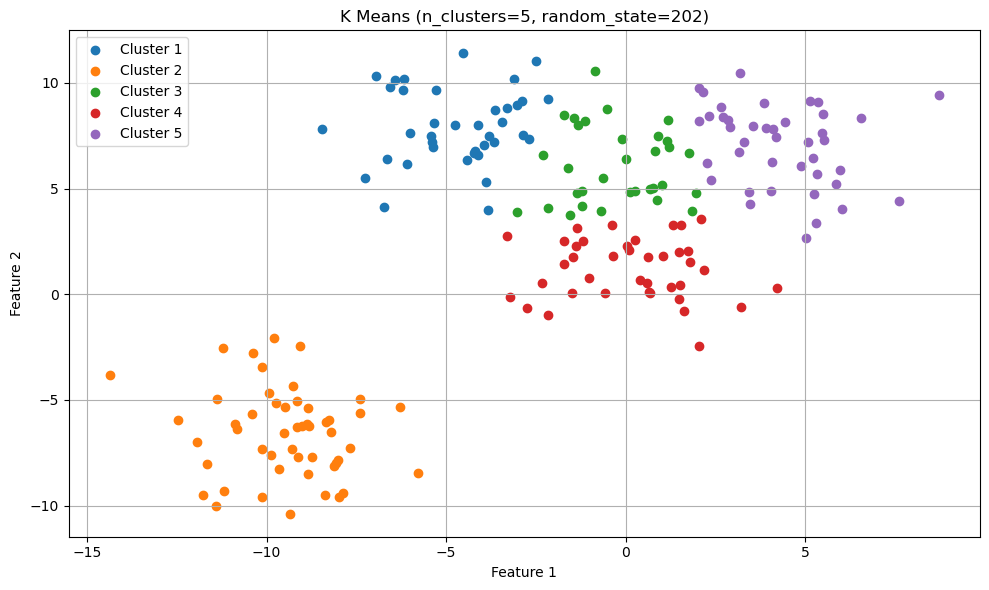

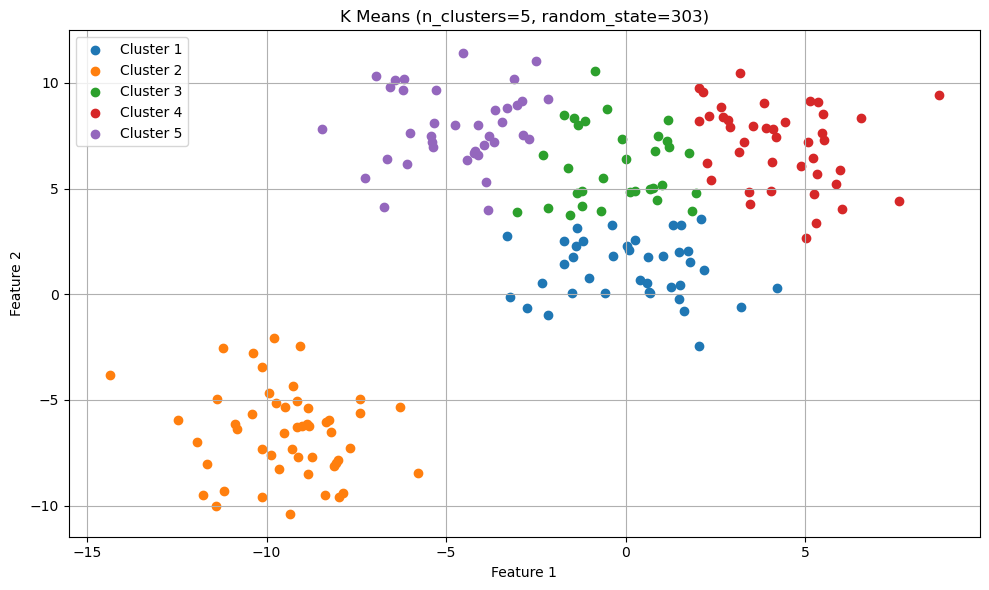

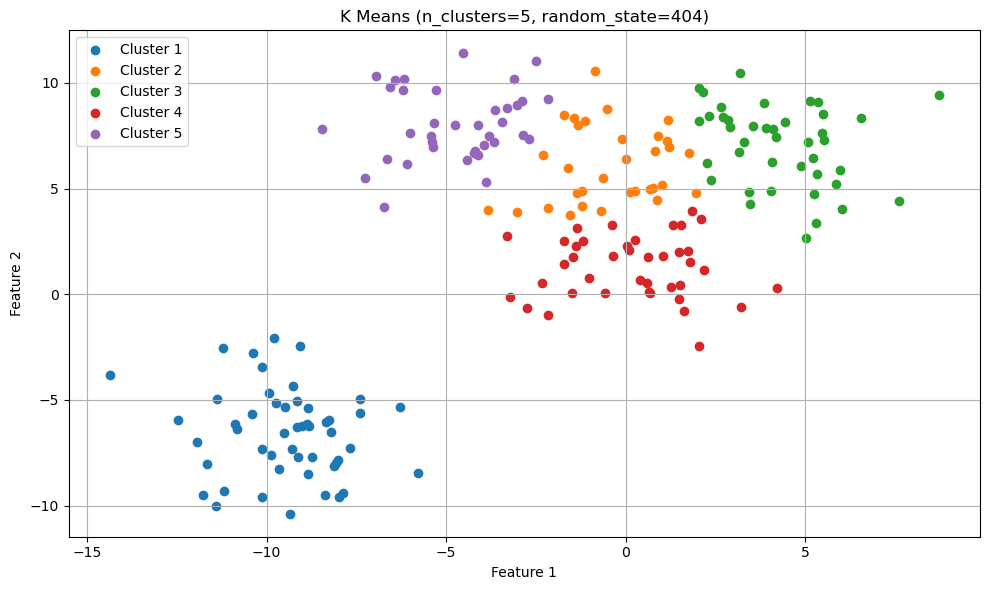

In [57]:
# Create data
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

# Define parameter values to test
n_clusters_values = [2, 3, 4, 5]
random_state_values = [101, 202, 303, 404]

# Loop over parameter values and fit the model
for n_clusters in n_clusters_values:
    for random_state in random_state_values:
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data[0])
        
        # Create subplots
        fig, (ax1) = plt.subplots(1, sharey=True, figsize=(10, 6))
        
        # Plot K-means clustering
        for i in range(n_clusters):
            cluster_points = data[0][kmeans.labels_ == i]
            ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], color=f'C{i}', marker='o', label=f'Cluster {i+1}')
        
        ax1.set_title(f'K Means (n_clusters={n_clusters}, random_state={random_state})')
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        ax1.grid(True)
        ax1.legend()
        
        # Display the subplots
        plt.tight_layout()
        plt.show()


#### Estimate the model

The silhouette score is a metric that considers both the cohesion within clusters and the separation between clusters. It quantifies how close each sample in one cluster is to the samples in the neighboring clusters. A higher silhouette score suggests that the samples within each cluster are similar to each other and dissimilar to samples in other clusters.

In [53]:
from sklearn.metrics import silhouette_score

best_score = -1
best_params = {}

# Loop over parameter values and fit the model
for n_clusters in n_clusters_values:
    for random_state in random_state_values:
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data[0])

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data[0], kmeans.labels_)

        # Update best score and parameters if the current score is higher
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'n_clusters': n_clusters, 'random_state': random_state}

# Print the best result
print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


Best Silhouette Score: 0.6490840372235874
Best Parameters: {'n_clusters': 2, 'random_state': 101}


Therefore, based on the silhouette score, the best clustering result for the given dataset is achieved when using 2 clusters with a random state of 101.

#### Elbow method

To find the best number of clusters using the "elbow method" and plot the results, we can calculate the inertia for different values of n_clusters and look for the "elbow" point on the resulting plot

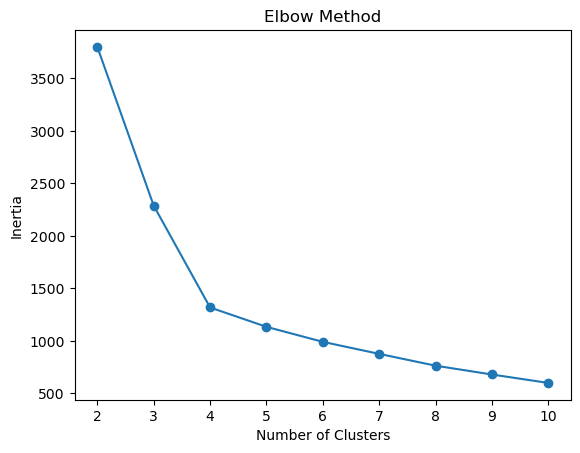

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Define parameter values to test
n_clusters_range = range(2, 11)  # Test cluster values from 2 to 10

inertia_values = []

# Loop over different values of n_clusters and calculate the inertia
for n_clusters in n_clusters_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=101)
    kmeans.fit(data[0])
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


It appears that the "elbow point" is at `n_clusters = 4`, indicating that it might be the optimal number of clusters for the given dataset. The elbow point is the point of inflection where the inertia starts to level off significantly. 